# Programmatic Data Access

In this tutorial, we are going to identify asteroids in the family of Themis with large albedos.
We will then scan archives for existing observations.

Compare albedo distribution of D-types in different parts of Main Belt
Check for archive observations

[Think: do you want to process many (>100) asteroids or just a few? -> Choose different approach]

On Tuesday, we learned
how to access data via APIs that webservices expose. Example APIs that offer access to asteroid data are

- SBDB
- asteroid.lowell.edu (no documentation)
- SsODNet

For all of these, you could access data using the `requests` package we saw on Tuesday, with more or less effort. 
In this tutorial, we continue exploring different methods of programmatic data
access, focusing in particular on data of small bodies. We look at two packages that offer direct access to one or more databases,
i.e. that perform the relevant queries for you. Both of them address slightly different use cases.

## `astroquery` - the Swiss Army Knife

[astroquery](https://astroquery.readthedocs.io/en/latest/) is an
[astropy](https://www.astropy.org/)-affiliated package providing access to
astronomical databases and catalogues. The strengths of this package is the
large [number of services](https://astroquery.readthedocs.io/en/latest/#available-services) that
can be queried with a uniform syntax, such as:

- [ESASky](http://sky.esa.int): Search the planetary science archive for observations from different missions (JWST, HST, Herschel, XMM-Newton, ...).
  You can search for observations of a specific coordinate, using the name of a star or galaxy, and even for solar system objects that happen to cross a field-of-view
  at the epoch of observation. A similar service is offered by the [IRSA Moving Object Search Tool](https://irsa.ipac.caltech.edu/applications/MOST).

In [1]:
from astroquery.esasky import ESASky
result = ESASky.query_sso(sso_name="Pallas", missions=["HST"])

result

TableList with 1 tables:
	'0:HST' with 45 column(s) and 80 row(s) 

- [VO Simple Cone Search](https://astroquery.readthedocs.io/en/latest/vo_conesearch/vo_conesearch.html): Search for stars and galaxies within a given radius around a given position. *(We saw this on Tuesday)*

In [2]:
from astropy.coordinates import SkyCoord
from astroquery.vo_conesearch import ConeSearch

c = SkyCoord.from_name('M31')
result = ConeSearch.query_region(c, '0.01 deg')

result

objID,gsc2ID,gsc1ID,hstID,ra,dec,epoch,raEpsilon,decEpsilon,rapm,decpm,rapmErr,decpmErr,deltaEpoch,FpgMag,FpgMagErr,FpgMagCode,JpgMag,JpgMagErr,JpgMagCode,NpgMag,NpgMagErr,NpgMagCode,UMag,UMagErr,UMagCode,BMag,BMagErr,BMagCode,VMag,VMagErr,VMagCode,RMag,RMagErr,RMagCode,IMag,IMagErr,IMagCode,JMag,JMagErr,JMagCode,HMag,HMagErr,HMagCode,KMag,KMagErr,KMagCode,class,semiMajorAxis,eccentricity,positionAngle,sourceStatus,variableFlag,multipleFlag,compassGSC2id,Mag
,,,,deg,deg,yr,arcsec,arcsec,mas / yr,mas / yr,mas / yr,mas / yr,yr,mag,mag,,mag,mag,,mag,mag,,mag,mag,,mag,mag,,mag,mag,,mag,mag,,mag,mag,,mag,mag,,mag,mag,,mag,mag,,,pixel,,deg,,,,,mag
int64,object,object,object,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,float32,float32,int32,float32,float32,int32,float32,float32,int32,float32,float32,int32,float32,float32,int32,float32,float32,int32,float32,float32,int32,float32,float32,int32,float32,float32,int32,float32,float32,int32,int32,float32,float32,float32,int64,int32,int32,int64,float32
23323175812944,00424433+4116085,,2MJG1R2O,10.684737,41.269035,1997.815,0.08,0.07,0.0,0.0,0.0,0.0,0.0,99.99,99.99,99,99.99,99.99,99,99.99,99.99,99,99.99,99.99,99,99.99,99.99,99,99.99,99.99,99,99.99,99.99,99,99.99,99.99,99,9.453,0.052,47,8.668,0.051,48,8.475,0.051,49,4,0.0,0.0,0.0,77777700,0,0,6453800072293,9.453
23323175812948,00424403+4116069,,2MJG1R2S,10.683469,41.268585,1997.815,0.13,0.12,0.0,0.0,0.0,0.0,0.0,99.99,99.99,99,99.99,99.99,99,99.99,99.99,99,99.99,99.99,99,99.99,99.99,99,99.99,99.99,99,99.99,99.99,99,99.99,99.99,99,9.321,-999.0,47,8.614,-999.0,48,10.601,0.025,49,4,0.0,0.0,0.0,77777700,0,0,6453800072297,9.321
23323175812933,00424455+4116103,,2MJG1R2D,10.685657,41.26955,1997.815,0.13,0.12,0.0,0.0,0.0,0.0,0.0,99.99,99.99,99,99.99,99.99,99,99.99,99.99,99,99.99,99.99,99,99.99,99.99,99,99.99,99.99,99,99.99,99.99,99,99.99,99.99,99,10.773,0.069,47,8.532,-999.0,48,8.254,-999.0,49,4,0.0,0.0,0.0,77777700,0,0,6453800072282,10.773
23323175812939,00424464+4116092,,2MJG1R2J,10.686026,41.269226,1997.815,0.13,0.12,0.0,0.0,0.0,0.0,0.0,99.99,99.99,99,99.99,99.99,99,99.99,99.99,99,99.99,99.99,99,99.99,99.99,99,99.99,99.99,99,99.99,99.99,99,99.99,99.99,99,9.299,-999.0,47,8.606,-999.0,48,10.119,0.056,49,4,0.0,0.0,0.0,77777700,0,0,6453800072288,9.299
23323175812930,00424403+4116108,,2MJG1R2A,10.683465,41.269676,1997.815,0.13,0.11,0.0,0.0,0.0,0.0,0.0,99.99,99.99,99,99.99,99.99,99,99.99,99.99,99,99.99,99.99,99,99.99,99.99,99,99.99,99.99,99,99.99,99.99,99,99.99,99.99,99,11.507,0.056,47,8.744,-999.0,48,8.489,-999.0,49,4,0.0,0.0,0.0,77777700,0,0,6453800072279,11.507
23323175812931,00424464+4116106,,2MJG1R2B,10.686015,41.26963,1997.815,0.13,0.12,0.0,0.0,0.0,0.0,0.0,99.99,99.99,99,99.99,99.99,99,99.99,99.99,99,99.99,99.99,99,99.99,99.99,99,99.99,99.99,99,99.99,99.99,99,99.99,99.99,99,9.399,-999.0,47,9.985,0.07,48,8.429,-999.0,49,4,0.0,0.0,0.0,77777700,0,0,6453800072280,9.399
23323175812973,00424446+4116016,,2MJG1R3H,10.68527,41.267124,1997.815,0.13,0.12,0.0,0.0,0.0,0.0,0.0,99.99,99.99,99,99.99,99.99,99,99.99,99.99,99,99.99,99.99,99,99.99,99.99,99,99.99,99.99,99,99.99,99.99,99,99.99,99.99,99,12.07,0.035,47,9.301,-999.0,48,9.057,-999.0,49,4,0.0,0.0,0.0,77777700,0,0,6453800072322,12.07
23323175812966,00424398+4116028,,2MJG1R3A,10.683263,41.267456,1997.815,0.13,0.12,0.0,0.0,0.0,0.0,0.0,99.99,99.99,99,99.99,99.99,99,99.99,99.99,99,99.99,99.99,99,99.99,99.99,99,99.99,99.99,99,99.99,99.99,99,99.99,99.99,99,12.136,0.04,47,9.226,-999.0,48,8.994,-999.0,49,4,0.0,0.0,0.0,77777700,0,0,6453800072315,12.136


- [Minor Planet Center Queries](https://minorplanetcenter.net/web_service/): Retrieve ephemerides, reported observations, and basic (orbital) properties of asteroids and comets.

In [3]:
from astroquery.mpc import MPC

eph = MPC.get_ephemeris('24')

eph

Date,RA,Dec,Delta,r,Elongation,Phase,V,Proper motion,Direction,Uncertainty 3sig,Unc. P.A.
,deg,deg,AU,AU,deg,deg,mag,arcsec / h,deg,arcsec,deg
Time,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64
2024-01-27 20:32:17.000,51.87833333333333,19.361666666666668,2.554,2.998,107.3,18.3,12.6,13.28,76.0,0,77.7
2024-01-28 20:32:17.000,51.97208333333333,19.38361111111111,2.567,2.997,106.4,18.4,12.6,14.09,76.0,0,76.7
2024-01-29 20:32:17.000,52.07125,19.40694444444444,2.579,2.996,105.5,18.5,12.7,14.89,76.1,0,77.6
2024-01-30 20:32:17.000,52.176249999999996,19.43138888888889,2.592,2.995,104.6,18.6,12.7,15.68,76.1,0,76.6
2024-01-31 20:32:17.000,52.28666666666666,19.45722222222222,2.604,2.994,103.7,18.6,12.7,16.46,76.1,0,76.6
2024-02-01 20:32:17.000,52.402499999999996,19.484166666666667,2.617,2.993,102.7,18.7,12.7,17.24,76.2,0,76.6
2024-02-02 20:32:17.000,52.523333333333326,19.51222222222222,2.63,2.992,101.9,18.8,12.7,18.01,76.2,0,76.6
2024-02-03 20:32:17.000,52.649583333333325,19.54138888888889,2.643,2.991,101.0,18.9,12.7,18.77,76.2,0,77.5


- [JPL Small-Body Database](https://ssd.jpl.nasa.gov/tools/sbdb_lookup.html): To get basic orbital and physical properties of asteroids and comets.

In [4]:
from astroquery.jplsbdb import SBDB

data = SBDB.query('16280')

SBDB.schematic(data)

'+-+ object: \n| +-- pha: False\n| +-- prefix: None\n| +-+ orbit_class: \n| | +-- name: Main-belt Asteroid\n| | +-- code: MBA\n| +-- orbit_id: 46\n| +-- shortname: 16280 Groussin\n| +-- neo: False\n| +-- fullname: 16280 Groussin (2000 LS6)\n| +-- spkid: 20016280\n| +-- kind: an\n| +-- des: 16280\n+-+ orbit: \n| +-- t_jup: 3.617\n| +-- rms: 0.51\n| +-- not_valid_before: None\n| +-- data_arc: 12085\n| +-- condition_code: 0\n| +-- first_obs: 1990-09-14\n| +-- moid_jup: 2.73 AU\n| +-- source: JPL\n| +-- last_obs: 2023-10-16\n| +-- cov_epoch: 2457887.5 d\n| +-- n_obs_used: 3943\n| +-- two_body: None\n| +-- epoch: 2460200.5 d\n| +-- orbit_id: 46\n| +-- n_dop_obs_used: None\n| +-- not_valid_after: None\n| +-- n_del_obs_used: None\n| +-+ elements: \n| | +-- e: 0.16\n| | +-- e_sig: 9.7e-10\n| | +-- a: 2.24 AU\n| | +-- a_sig: 6.4e-10 AU\n| | +-- q: 1.88 AU\n| | +-- q_sig: 2.2e-09 AU\n| | +-- i: 5.04 deg\n| | +-- i_sig: 5e-08 deg\n| | +-- om: 170.0 deg\n| | +-- om_sig: 3e-07 deg\n| | +-- w: 157.0

<!-- SBDB has limitations: limited number of parameters, bibliography, you cannot query multiple objects at once -->

---

`astroquery` is thus a great package especially when you want to combine results from different services. 

However, the services that provide small-body data and are integrated in `astroquery` (NeoDys, SBDB, MPC) only allow for single-object queries: Where is
this asteroid going to be? What are the orbital parameters of that asteroid? Instead, our research questions commonly require us to regard a large number of
objects: What is the albedo distribution of asteroids in the Koronis family? We are therefore going to combine `astroquery` with a second package.

## `rocks` - client for SsODNet

If `astroquery` is the Swiss Army Knife of data-access, `rocks` is a simple screwdriver. It follows the Unix philosophy: do one thing and do it well.
In this case, the thing done well is the interaction with the SsODNet services of the IMCCE.

`rocks` is built around the SsODNet API (using the `requests` library [link to ssodnet.py file on github]). It ingests the ssoCard (`JSON` server response) and converts
them into `python` objects called `Rock`.

In [5]:
import rocks

# retrieve and ingest ssoCard of (1) Ceres
ceres = rocks.Rock(1)

ceres

Rock(number=1, name='Ceres')

You can now access all data of your object-of-interest via the dot-notation.

In [6]:
print(ceres.name)
print(ceres.number)
print(ceres.albedo.value)
print(ceres.albedo.bibref.shortbib)

Ceres
1
0.034
['Li+2016']


If you have more than one asteroid in mind, you use the `rocks.rocks` function to create many `Rock`s.

In [7]:
targets = rocks.rocks(['ceres', 'pallas', 'juno', 'vesta'])

for target in targets:
    print(f"The albedo of ({target.number}) {target.name} is {target.albedo.value:.2} [{target.albedo.bibref.shortbib}].")

The albedo of (1) Ceres is 0.034 [['Li+2016']].
The albedo of (2) Pallas is 0.14 [['Berthier+2023']].
The albedo of (3) Juno is 0.22 [['Berthier+2023']].
The albedo of (4) Vesta is 0.38 [['Li+2013']].


The strength of `rocks` lies in its simple syntax: The small body is the object that we are working with, rather than being one row in a `pandas.DataFrame`
that we have to awkwardly index to access any parameter.

The downside of `rocks` is that it currently only supports asteroids: comets are a work-in-progress.

---

Getting back to the science case: [...]

Besides the single-object ssoCard, SsODNet offers the *Big Flat Table* (BFT) to access the attributes of all known asteroids. This makes it easy to query 
for asteroids based on shared properties.

In [32]:

# Load BFT as pandas DataFrame
bft = rocks.load_bft()

# Get asteroids that have been classified as D-type
dtypes = bft[bft['taxonomy.class'].isin(['D'])]
print(f"Found {len(dtypes)} asteroids.") 

Found 3534 asteroids.


Index(['sso_id', 'sso_number', 'sso_name', 'sso_type', 'sso_class', 'ssocard',
       'orbital_elements.ref_epoch', 'orbital_elements.number_observation',
       'orbital_elements.orbital_arc', 'orbital_elements.ceu.value',
       ...
       'spins.4.DEC0.value', 'spins.4.DEC0.error.min',
       'spins.4.DEC0.error.max', 'spins.4.long.value',
       'spins.4.long.error.min', 'spins.4.long.error.max', 'spins.4.lat.value',
       'spins.4.lat.error.min', 'spins.4.lat.error.max', 'spins.4.technique'],
      dtype='object', length=680)

In [33]:
x = "proper_elements.proper_semi_major_axis.value"
y = "albedo.value"

We map the orbital distribution.

Now we add the albedo.

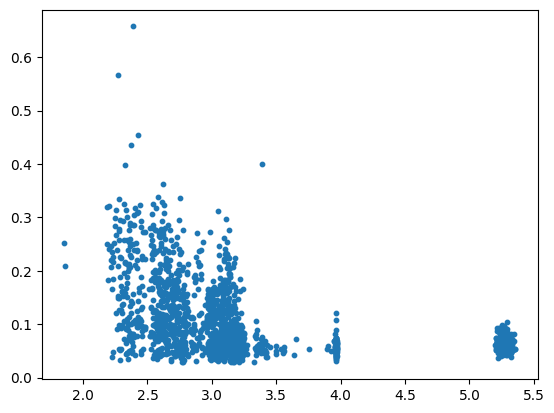

In [34]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(dtypes[x], dtypes[y], s=10)


In [55]:

# Load BFT as pandas DataFrame
bft = rocks.load_bft(full=True)
print(len(bft[(bft['taxonomy.waverange'] == 'VISNIR') & (bft['taxonomy.scheme'].isin(['Tholen','Bus']))]))
# Get asteroids that have been classified as D-type
dtypes = bft[(bft['taxonomy.class'].isin(['D'])) & (bft['taxonomy.waverange'] == 'VISNIR')]
print(f"Found {len(dtypes)} asteroids.") 

29
Found 130 asteroids.


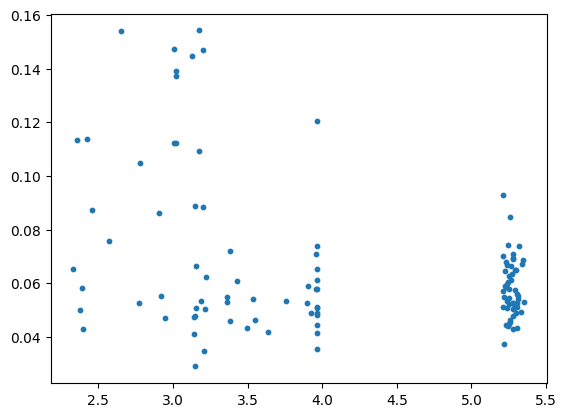

In [56]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(dtypes[x], dtypes[y], s=10)

Working with pd.DataFrames on a per-line basis quickly gets tedious due to all the indexing.
Switching back to using the `Rock` class.

In [51]:
dtypes_bright = dtypes.loc[dtypes['albedo.value'] > 0.1, 'sso_name']

targets = rocks.rocks(dtypes_bright)
print(len(targets))
for target in targets:
  print(target.number, target.name, target.class_, target.albedo.value)
  print(target.family.family_name, target.taxonomy.scheme, target.taxonomy.bibref.shortbib)

16
3318 Blixen MB>Outer 0.1121
Eos Bus ['"MotheDiniz+2008a"']
3469 Bulgakov MB>Outer 0.1372
Eos Bus ['"MotheDiniz+2008a"']
2315 Czechoslovakia MB>Outer 0.1474
Eos Bus ['"MotheDiniz+2008a"']
2098 Zyskin MB>Inner 0.1139
 Mahlke ['"Mahlke+2022"']
199 Byblis MB>Outer 0.1542
 Mahlke ['"Mahlke+2022"']
322 Phaeo MB>Middle 0.105
 Mahlke ['"Mahlke+2022"']
1162 Larissa MB>Hilda 0.1203
 Mahlke ['"Mahlke+2022"']
1461 Jean-Jacques MB>Outer 0.1448
 Mahlke ['"Mahlke+2022"']
1416 Renauxa MB>Outer 0.1123
Eos Bus ['"MotheDiniz+2008a"']
1413 Roucarie MB>Outer 0.1392
Eos Bus ['"MotheDiniz+2008a"']
1090 Sumida Phocaea 0.1133
 Mahlke ['"Mahlke+2022"']
6842 Krosigk MB>Middle 0.1539
Aeria Mahlke ['"Mahlke+2022"']
931 Whittemora MB>Outer 0.1093
 Mahlke ['"Mahlke+2022"']
595 Polyxena MB>Outer 0.1469
 Mahlke ['"Mahlke+2022"']
333888 1998 ST4 NEA>Amor 0.1041
 Mahlke ['"Mahlke+2022"']
162998 2001 SK162 NEA>Apollo 0.1596
 Mahlke ['"Mahlke+2022"']


There are some with high albedo. Let's explore further.


Caveat: comets not yet supported, TBD

## Bibliography